<a href="https://colab.research.google.com/github/bobrowskijan/UEP/blob/main/PUM_13_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
ratings = pd.read_csv('/content/ratings.csv')
movies = pd.read_csv('/content/movies.csv')

In [26]:
ratings.head(-5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100826,610,162350,3.5,1493849971
100827,610,163937,3.5,1493848789
100828,610,163981,3.5,1493850155
100829,610,164179,5.0,1493845631


Liczba wszystkich ocen: 100836
Liczba filmów w bazie: 9742
Liczba użytkowników: 610
Średnia liczba ocen na użytkownika: 165.30491803278687
Średnia liczba ocen na film: 10.350646684459043
Rozkład ocen:
rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64


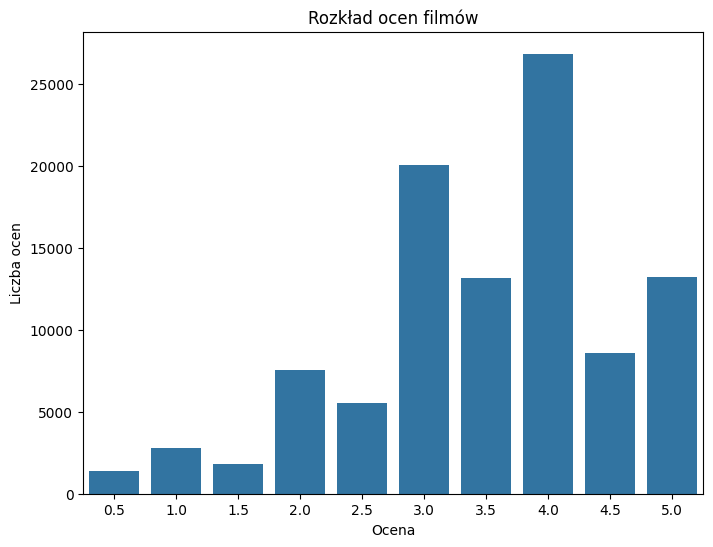

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liczba wszystkich ocen
total_ratings = len(ratings)
print(f"Liczba wszystkich ocen: {total_ratings}")

# Liczba filmów w bazie
total_movies = len(movies)
print(f"Liczba filmów w bazie: {total_movies}")

# Liczba użytkowników
total_users = ratings['userId'].nunique()
print(f"Liczba użytkowników: {total_users}")

# Średnia liczba ocen na użytkownika
avg_ratings_per_user = total_ratings / total_users
print(f"Średnia liczba ocen na użytkownika: {avg_ratings_per_user}")

# Średnia liczba ocen na film
avg_ratings_per_movie = total_ratings / total_movies
print(f"Średnia liczba ocen na film: {avg_ratings_per_movie}")

# Rozkład ocen
rating_counts = ratings['rating'].value_counts().sort_index()
print(f"Rozkład ocen:\n{rating_counts}")


# Wykres rozkładu ocen
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Rozkład ocen filmów')
plt.xlabel('Ocena')
plt.ylabel('Liczba ocen')
plt.show()


In [3]:
movie_titles = dict(zip(movies['movieId'],
movies['title']))
movie_titles

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (199

In [4]:

# Obliczenie statystyk filmów (liczba ocen i średnia ocena)
movie_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

# Parametry dla Bayesian Average
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C * m + ratings.sum()) / (C + ratings.count())
    return bayesian_avg

bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']

movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')

# Wyświetlenie statystyk filmów z Bayesian Average
print(movie_stats.head())



   movieId  count      mean  bayesian_avg
0        1    215  3.920930      3.890632
1        2    110  3.431818      3.417227
2        3     52  3.259615      3.260086
3        4      7  2.357143      2.897612
4        5     49  3.071429      3.104793


In [5]:
# Find the movie with the highest Bayesian average rating.
max_bayesian_avg_movie = movie_stats.loc[movie_stats['bayesian_avg'].idxmax()]

# Get the movie ID with the highest Bayesian average.
movie_id_max_bayesian = max_bayesian_avg_movie['movieId']

# Use the movie ID to look up the title in the movie_titles dictionary.
movie_title_max_bayesian = movie_titles.get(movie_id_max_bayesian, "Movie title not found")

print(f"The movie with the highest Bayesian average rating is: {movie_title_max_bayesian}")


The movie with the highest Bayesian average rating is: Shawshank Redemption, The (1994)


In [36]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2461556 sha256=a2afc5f89d1a2c8032695372e14c52ea26a43716501d2b8b797ec8e7b28a6286
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [43]:
!pip install numpy==1.24.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have nump

In [6]:
# importing relevant libraries
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise import Dataset
from surprise import Reader

In [11]:
# Get minimum and maximum rating from the ratings DataFrame
#dataset  <-- this line is removed
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()
reader = Reader(rating_scale=(min_rating,max_rating))
data = Dataset.load_from_df(ratings[['userId','movieId', 'rating']], reader)
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8815  0.8758  0.8723  0.8674  0.8684  0.8731  0.0051  
MAE (testset)     0.6764  0.6744  0.6682  0.6678  0.6678  0.6709  0.0037  
Fit time          1.78    1.63    1.65    1.49    1.78    1.67    0.11    
Test time         0.11    0.20    0.13    0.12    0.23    0.16    0.05    


{'test_rmse': array([0.88147291, 0.87575977, 0.87228915, 0.86738858, 0.86843139]),
 'test_mae': array([0.67638524, 0.67437209, 0.66823251, 0.66781335, 0.66780175]),
 'fit_time': (1.776306390762329,
  1.6269075870513916,
  1.654463768005371,
  1.4925167560577393,
  1.7840182781219482),
 'test_time': (0.11265826225280762,
  0.19832396507263184,
  0.13416814804077148,
  0.11527204513549805,
  0.2294294834136963)}

In [13]:
# prompt: Zrób metodę rekomendacji filmów do obejrzenia dla użytkownika 600

def recommend_movies(user_id, num_recommendations=5):
    """
    Rekomenduje filmy dla danego użytkownika na podstawie modelu SVD.

    Args:
        user_id: ID użytkownika.
        num_recommendations: Liczba rekomendacji do zwrócenia.

    Returns:
        Listę tytułów rekomendowanych filmów.
    """

    # Trenowanie modelu SVD na całym zbiorze danych
    trainset = data.build_full_trainset()
    algo.fit(trainset)

    # Pobranie listy filmów, których użytkownik jeszcze nie ocenił
    user_rated_movies = ratings[ratings['userId'] == user_id]['movieId'].tolist()
    all_movie_ids = movies['movieId'].tolist()
    unrated_movies = [movie for movie in all_movie_ids if movie not in user_rated_movies]

    # Predykcja ocen dla nieocenionych filmów
    predictions = []
    for movie_id in unrated_movies:
        predictions.append(algo.predict(user_id, movie_id))

    # Sortowanie predykcji malejąco według estymowanej oceny
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Zwrócenie listy tytułów rekomendowanych filmów
    recommended_movies = []
    for prediction in predictions[:num_recommendations]:
        movie_id = prediction.iid
        movie_title = movie_titles.get(movie_id, "Nieznany tytuł")
        recommended_movies.append(movie_title)

    return recommended_movies


# Przykładowe użycie dla użytkownika 600
recommendations = recommend_movies(600, 10)
print(f"Rekomendacje dla użytkownika 600:\n{recommendations}")


Rekomendacje dla użytkownika 600:
['Reservoir Dogs (1992)', "Monty Python's Life of Brian (1979)", 'Departed, The (2006)', 'Lock, Stock & Two Smoking Barrels (1998)', 'Night of the Living Dead (1968)', 'Blade Runner (1982)', 'Barton Fink (1991)', 'Amadeus (1984)', 'Apocalypse Now (1979)', 'Animal Crackers (1930)']
